# Module 6 - Wrap-Up Quiz

## Data Import

In [1]:
import pandas as pd

dataset = pd.read_csv("../datasets/penguins.csv")

feature_names = [
    "Culmen Length (mm)",
    "Culmen Depth (mm)",
    "Flipper Length (mm)",
]
target_name = "Body Mass (g)"

dataset = dataset[feature_names + [target_name]].dropna(axis="rows", how="any")
dataset = dataset.sample(frac=1, random_state=0).reset_index(drop=True)
data, target = dataset[feature_names], dataset[target_name]

## Baseline Model Evaluation

### Decision Tree Regressor

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

baseline_DTR = DecisionTreeRegressor(random_state=0)

blDTR_cv_results = cross_validate(baseline_DTR, data, target, cv=10, return_train_score=True)

### Random Forest Regressor

In [5]:
from sklearn.ensemble import RandomForestRegressor

baseline_RFR = RandomForestRegressor(random_state=0)

blRFR_cv_results = cross_validate(baseline_RFR, data, target, cv=10, return_train_score=True)

### Model Comparison

In [13]:
print(f"{baseline_DTR.__class__.__name__}\n{'-'*len(baseline_DTR.__class__.__name__)}\n"
      f"Mean Test Score: {blDTR_cv_results['test_score'].mean():.4f}"
      f" ± {blDTR_cv_results['test_score'].std():.4f}\n")

print(f"{baseline_RFR.__class__.__name__}\n{'-'*len(baseline_RFR.__class__.__name__)}\n"
      f"Mean Test Score: {blRFR_cv_results['test_score'].mean():.4f}"
      f" ± {blRFR_cv_results['test_score'].std():.4f}\n")

RFR_DTR_comparison = sum(blRFR_cv_results['test_score'] > blDTR_cv_results['test_score'])

print(f"{baseline_RFR.__class__.__name__} out performs {baseline_DTR.__class__.__name__} "
      f"{RFR_DTR_comparison} times out of {len(blDTR_cv_results['test_score'])}")

DecisionTreeRegressor
---------------------
Mean Test Score: 0.6275 ± 0.0997

RandomForestRegressor
---------------------
Mean Test Score: 0.8036 ± 0.0447

RandomForestRegressor out performs DecisionTreeRegressor 10 times out of 10


## Random Forest with 5 & 100 decision tress

### Setting `n_estimators` to 5

In [28]:
baseline_RFR.set_params(n_estimators=5)
print(f"n_estimators is {baseline_RFR.get_params()['n_estimators']}")

blRFR_n5_cv_results = cross_validate(baseline_RFR, data, target, cv=10, return_train_score=True)

n_estimators is 5


The default `n_estimators` is 100. Thus, the previous cv results for Random Forest can be used for the comparison.

In [29]:
print(f"{baseline_DTR.__class__.__name__}\n{'-'*len(baseline_DTR.__class__.__name__)}\n"
      f"Mean Test Score: {blRFR_n5_cv_results['test_score'].mean():.4f}"
      f" ± {blRFR_n5_cv_results['test_score'].std():.4f}\n")

print(f"{baseline_RFR.__class__.__name__}\n{'-'*len(baseline_RFR.__class__.__name__)}\n"
      f"Mean Test Score: {blRFR_cv_results['test_score'].mean():.4f}"
      f" ± {blRFR_cv_results['test_score'].std():.4f}\n")

n100_n5_comparison = sum(blRFR_cv_results['test_score'] > blRFR_n5_cv_results['test_score'])

print(f"`n = 100` out performs `n = 5` "
      f"{n100_n5_comparison} times out of {len(blRFR_cv_results['test_score'])}")

DecisionTreeRegressor
---------------------
Mean Test Score: 0.7669 ± 0.0736

RandomForestRegressor
---------------------
Mean Test Score: 0.8036 ± 0.0447

`n = 100` out performs `n = 5` 9 times out of 10


Adding trees in the forest helps improving the generalization performance of the model.

We can also get more insights by comparing the test and training scores of each model:

In [33]:
print(
    "Scores for random forest with 5 trees:\n"
    f"train: {blRFR_n5_cv_results['train_score'].mean():.3f} ± "
    f"{blRFR_n5_cv_results['train_score'].std():.3f} || "
    f"test: {blRFR_n5_cv_results['test_score'].mean():.3f} ± "
    f"{blRFR_n5_cv_results['test_score'].std():.3f}"
)
print(    
    "Scores for random forest with 100 trees:\n"
    f"train: {blRFR_cv_results['train_score'].mean():.3f} ± "
    f"{blRFR_cv_results['train_score'].std():.3f} || "
    f"test: {blRFR_cv_results['test_score'].mean():.3f} ± "
    f"{blRFR_cv_results['test_score'].std():.3f}"
  )

Scores for random forest with 5 trees:
train: 0.950 ± 0.003 || test: 0.767 ± 0.074
Scores for random forest with 100 trees:
train: 0.972 ± 0.001 || test: 0.804 ± 0.045


On the model with 5 trees, the average train score was already quite high but the test scores were quite low. The performance of this small random forest is therefore primarily limited by overfitting.

In the forest with 100 trees, the train score is still high (even slightly higher), and the test scores have increased. Overfitting was reduced by adding more trees to the forest.

## Validation Curves

### Validation curve of `n_estimators` with default `max_depth`

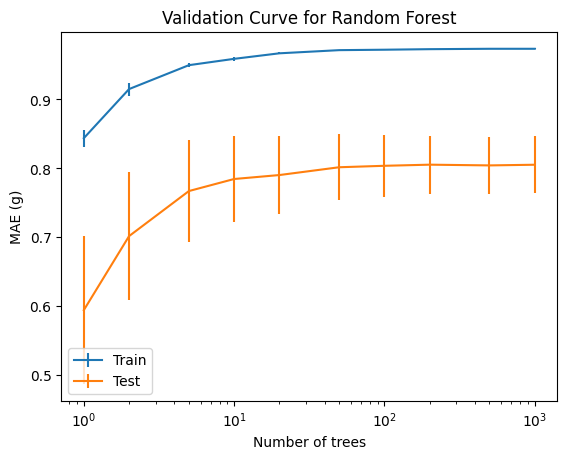

In [10]:
import numpy as np
from sklearn.model_selection import ValidationCurveDisplay

n_estimators = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000])

disp = ValidationCurveDisplay.from_estimator(
    baseline_RFR,
    data,
    target,
    param_name="n_estimators",
    param_range=n_estimators,
    cv=10,
    scoring="r2",
    score_name="R2 Score",
    std_display_style="errorbar",
    n_jobs=2,
)
_ = disp.ax_.set(
    xlabel="Number of trees",
    ylabel="MAE (g)",
    title="Validation Curve for Random Forest",
)

We observe that above 500 trees, both the train and test scores become nearly constant. This diminishing returns effect is typical of Random Forests and bagging ensembles in general.

### Validation curve of `n_estimators` with `max_depth = 5`

`max_depth` = None
`max_depth` = 5


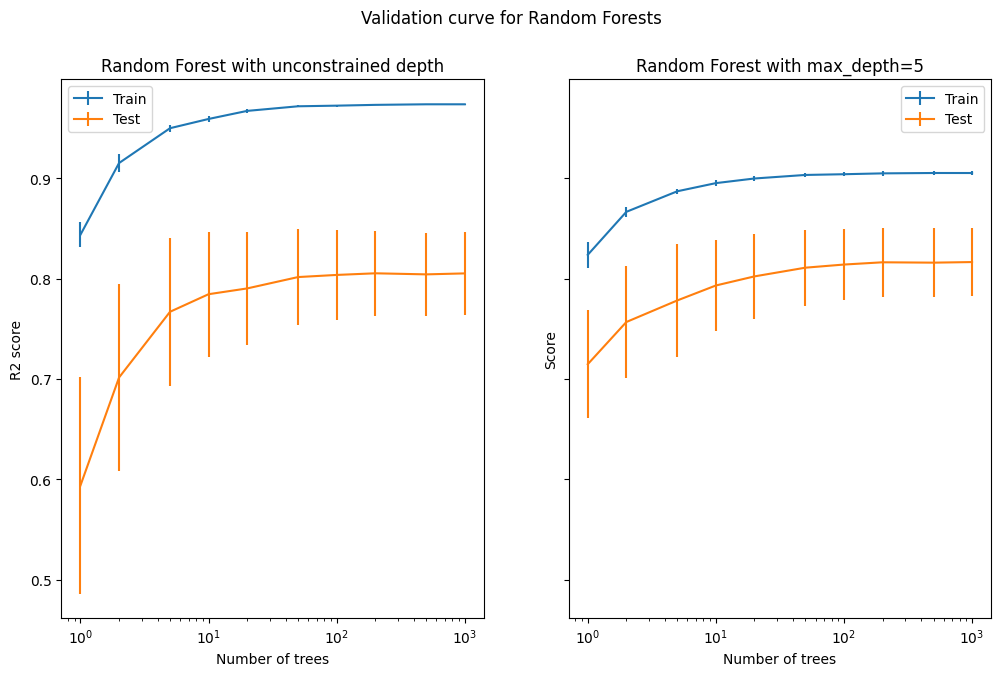

In [42]:
import matplotlib.pyplot as plt

cv =10

baseline_RFR.set_params(max_depth=None)
print(f"`max_depth` = {baseline_RFR.get_params()['max_depth']}")

fig, axs = plt.subplots(ncols=2, figsize=(12, 7),  sharey=True)
ValidationCurveDisplay.from_estimator(
    baseline_RFR,
    data,
    target,
    param_name="n_estimators",
    param_range=n_estimators,
    scoring="r2",
    score_name="R2 score",
    std_display_style="errorbar",
    cv=cv,
    n_jobs=2,
    ax=axs[0]
)

baseline_RFR.set_params(max_depth=5)
print(f"`max_depth` = {baseline_RFR.get_params()['max_depth']}")

ValidationCurveDisplay.from_estimator(
    baseline_RFR,
    data,
    target,
    param_name="n_estimators",
    param_range=n_estimators,
    std_display_style="errorbar",
    cv=cv,
    n_jobs=2,
    ax=axs[1],
)

axs[0].set(
    xlabel="Number of trees",
    title="Random Forest with unconstrained depth",
)
axs[1].set(
    xlabel="Number of trees",
    title="Random Forest with max_depth=5",
)
_ = fig.suptitle("Validation curve for Random Forests")

We see that decreasing the depth reduces the gap between the train and test scores. We also see that the random forest with limited depth has a better generalization performance for a small number of trees but becomes equivalent for higher numbers of trees. We can conclude that the random forest models with a limited depth overfit less than the random forest with fully grown trees, especially when the number of trees in the ensemble is small.

One can also observe that the limiting the depth has a significant effect on limiting the training score (ability to memorize exactly the training data) and that this effect remains important, even when increasing the size of the ensemble.

## Investigating Memorization

If you we evaluate the training accuracy of the single DecisionTreeRegressor one gets perfect memorization of the training data:

In [3]:
blDTR_cv_results['train_score']

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

On the opposite, a single-tree Random Forest can never reach a perfect R2 score of 1.0 on the training.

In [7]:
baseline_RFR.set_params(n_estimators=1)
print(f"n_estimators is {baseline_RFR.get_params()['n_estimators']}")

blRFR_cv_results = cross_validate(baseline_RFR, data, target, cv=10, return_train_score=True)
blRFR_cv_results['train_score']

n_estimators is 1


array([0.83120264, 0.83309064, 0.83195043, 0.84834224, 0.85790323,
       0.86235297, 0.84791111, 0.85183089, 0.82241954, 0.85045978])

By default, random forests train their trees with a bootstrapping procedure. Since each tree is trained on a bootstrap sample, some data points from the original training set are not seen by each individual trees in the forest. As a result the single-tree RF model does not make perfect predictions on those data-points (named out-of-bag samples) which prevents the training score to reach 1.0.

We can confirm this hypothesis by deactivating the bootstrap option and checking again the train scores (leaving all the other hyper-parameters unchanged):

In [9]:
rf_1_tree = RandomForestRegressor(n_estimators=1, bootstrap=False, random_state=0)
cross_validate(rf_1_tree, data, target, cv=10, return_train_score=True)["train_score"]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In this case, we fall back to the same algorithm as the single decision tree by training on the original data and thus overfitting the original training dataset.

We can also note, that when increasing the number of trees to 5 or 10, the sub-optimal training caused by bootstrapping vanishes quickly away. Random Forests are typically trained with at least 10 trees and typically much more than that, so this effect is almost never observed in practice.

Furthermore, even with a single bootstrapped tree, an R2 score larger than 0.85 is still very high and typically much larger than the test score for the same model. As a result, even if the training score of that model is not perfect, one cannot conclude that the generalization performance of a single tree-random forest is limited by underfitting. Instead single tree models are typically limited by overfitting when there depth is not bound.

## Gradient Boosting

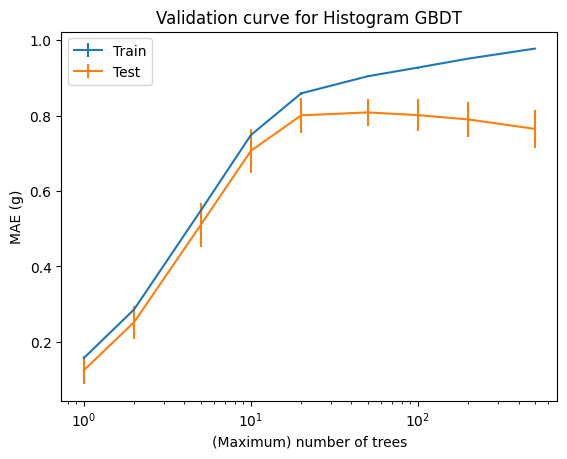

In [14]:
from sklearn.ensemble import HistGradientBoostingRegressor

max_iters = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500])

hgbr = HistGradientBoostingRegressor()

disp = ValidationCurveDisplay.from_estimator(
    hgbr,
    data,
    target,
    param_name="max_iter",
    param_range=max_iters,
    cv=10,
    scoring="r2",
    score_name="R2 Score",
    std_display_style="errorbar",
    n_jobs=2,
)
_ = disp.ax_.set(
    xlabel="(Maximum) number of trees",
    ylabel="MAE (g)",
    title="Validation curve for Histogram GBDT",
)


In the figure, we can clearly observe the three phase behavior "underfitting / best generalization / overfitting" of gradient boosting models. Indeed, with a low number of trees, the model has a low score for both the train and test scores. We can clearly see that the test scores are bound above by the train score, which is characteristic of underfitting models (contrary to what we previously observed on the learning curve of the RF models).

Both scores then improve until a sweet spot (~50 trees) where the test score is maximum. After this, the gradient boosting algorithm starts to overfit: the train score improves towards reaching a perfect score of 1 while the test score reduces. Indeed, the model starts to memorize specific rules only true on the training set. These rules become detrimental on the generalization performance of the model.

Here, it shows the importance of not adding too many trees to our gradient boosting ensemble. Indeed, one can use early-stopping and monitor the performance on an internal validation set to stop adding new trees when the validation score stops improving. Here is an example to show how to do this automatically:

In [16]:
hgbdt = HistGradientBoostingRegressor(early_stopping=True, random_state=0)
cv_results_hgbdt = cross_validate(
    hgbdt, data, target, cv=10, return_train_score=True, return_estimator=True
    )
cv_results_hgbdt["train_score"].mean(), cv_results_hgbdt["train_score"].std()

(0.8802093174685013, 0.009772033922083758)

We see that the train score is not perfect meaning that our model stopped much before adding too many trees. We can check the generalization performance to ensure that an equivalent model to the previous random forest:

In [17]:
cv_results_hgbdt["test_score"].mean(), cv_results_hgbdt["test_score"].std()

(0.8075456252855009, 0.030400979794505564)

So we observe that on average, the model performs as good as a large random forest.
Finally, we can check how many trees where used for each CV iteration:

In [18]:
for idx, est in enumerate(cv_results_hgbdt["estimator"]):
    print(
        f"For CV iteration {idx + 1}, {est.n_iter_} trees were built"
    )

For CV iteration 1, 60 trees were built
For CV iteration 2, 50 trees were built
For CV iteration 3, 46 trees were built
For CV iteration 4, 29 trees were built
For CV iteration 5, 33 trees were built
For CV iteration 6, 33 trees were built
For CV iteration 7, 36 trees were built
For CV iteration 8, 31 trees were built
For CV iteration 9, 24 trees were built
For CV iteration 10, 23 trees were built


We therefore see that we never used more than 60 trees, before entering the overfitting zone we observed on the validation curve.

Even if this model is not stronger than a large random forest, it is smaller which means that it can be much faster to predict and will use fewer memory (RAM) on the machines where it is deployed. This is a practical advantage of Gradient Boosted Trees with early stopping over Random Forests with a large number of deep trees.